In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Cleaned_Data.csv')
df

,Month,Ayr Hospital,BARCALDINE HOSPITAL,BLACKALL HOSPITAL,Beaudesert Hospital,Biloela Hospital,Caloundra Hospital,Capricorn Coast Hospital,Charleville Hospital,Charters Towers Hospital,...,Longreach Hospital,Oakey Hospital,Proserpine Hospital,Roma Hospital,St George Hospital,Stanthorpe Hospital,Thursday Island Hospital,WINTON HOSPITAL,Warwick Hospital,Weipa Hospital
0,2015-07-01,822.0,241.0,171.0,1175.0,524.0,0.0,1019.0,514.0,805.0,...,405.0,186.0,915.0,810.0,484.0,574.0,364.0,125.0,1476.0,656.0
1,2015-08-01,971.0,287.0,167.0,1408.0,523.0,0.0,1086.0,603.0,837.0,...,421.0,235.0,1110.0,836.0,562.0,713.0,374.0,140.0,1733.0,564.0
2,2015-09-01,881.0,226.0,159.0,1186.0,415.0,0.0,1029.0,555.0,792.0,...,416.0,221.0,841.0,806.0,541.0,612.0,370.0,177.0,1609.0,533.0
3,2015-10-01,885.0,222.0,133.0,1232.0,482.0,0.0,1071.0,446.0,766.0,...,362.0,207.0,875.0,772.0,462.0,585.0,465.0,115.0,1602.0,523.0
4,2015-11-01,833.0,169.0,137.0,1250.0,579.0,0.0,1137.0,472.0,776.0,...,329.0,202.0,870.0,741.0,410.0,596.0,456.0,145.0,1596.0,567.0
5,2015-12-01,857.0,118.0,201.0,1190.0,488.0,0.0,1186.0,383.0,767.0,...,408.0,218.0,948.0,698.0,523.0,719.0,454.0,107.0,1649.0,591.0
6,2016-01-01,950.0,124.0,216.0,1239.0,478.0,0.0,1126.0,476.0,763.0,...,393.0,231.0,940.0,721.0,485.0,728.0,398.0,128.0,1646.0,540.0
7,2016-02-01,854.0,120.0,153.0,1193.0,500.0,0.0,1048.0,619.0,789.0,...,379.0,231.0,831.0,758.0,412.0,711.0,414.0,118.0,1619.0,663.0
8,2016-03-01,952.0,106.0,171.0,1271.0,558.0,0.0,1150.0,492.0,819.0,...,415.0,222.0,936.0,816.0,452.0,915.0,482.0,120.0,1753.0,633.0
9,2016-04-01,929.0,206.0,168.0,1152.0,582.0,0.0,1200.0,534.0,747.0,...,456.0,223.0,906.0,674.0,455.0,786.0,404.0,96.0,1571.0,541.0


In [3]:
#select one hospital
df_hostital = df[['Month', 'Charleville Hospital']]
df_hostital 

,Month,Charleville Hospital
0,2015-07-01,514.0
1,2015-08-01,603.0
2,2015-09-01,555.0
3,2015-10-01,446.0
4,2015-11-01,472.0
5,2015-12-01,383.0
6,2016-01-01,476.0
7,2016-02-01,619.0
8,2016-03-01,492.0
9,2016-04-01,534.0


In [14]:
# Sorting Data of hospital and make month as index

df_hostital_sorted= df_hostital.sort_values('Month')
df_hostital_sorted = df_hostital.groupby('Month')['Charleville Hospital'].sum().reset_index()
df_hostital_sorted = df_hostital.set_index('Month')
df_hostital_sorted.index
train=df_hostital_sorted[0:31] 
test=df_hostital_sorted[30:]
test_long =df_hostital_sorted[2:]
test

,Charleville Hospital
Month,
2018-01-01,611.0
2018-02-01,446.0
2018-03-01,404.0
2018-04-01,416.0
2018-05-01,425.0
2018-06-01,397.0


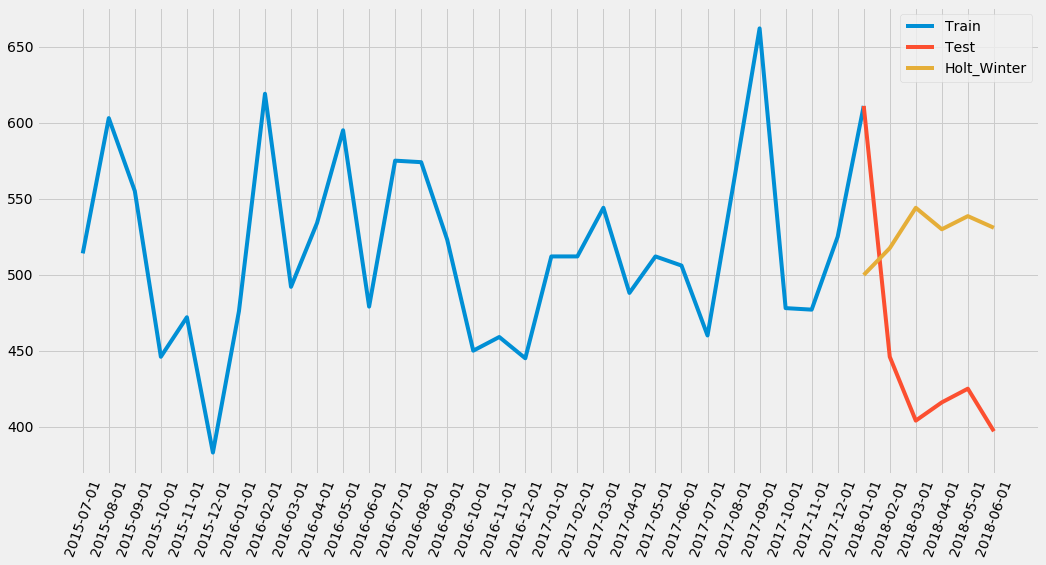

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

hot_winter = test.copy()
fitholt_w = ExponentialSmoothing(np.asarray(train['Charleville Hospital']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
hot_winter['Holt_Winter'] = fitholt_w.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Charleville Hospital'], label='Train')
plt.plot(test['Charleville Hospital'], label='Test')
plt.plot(hot_winter['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.xticks(rotation=70)
plt.show()

In [13]:
rms_holt = mean_squared_error(test ['Charleville Hospital'], hot_winter['Holt_Winter'])
print(rms_holt)

h2 = pow(rms_holt, 0.5) 
h2

13472.13096566854


116.0695091988785